<font size="4"> PoreC </font>

<font size="3"> Technical preface </font>

<font size="2"> This notebook is run in a custom Python kernel in which Nanopores s pore_c tool is installed. The environment specificiation is located in envs/pore_c_dev.yaml. </font>

<font size="2"> Loading in the summary files. </font>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = None

Project 2940

In [9]:
Ori_NPCs_rep1_concat_summary = pd.read_csv("/data/akhtar/Mouse2019AlleleSpecific3/Project_2940_poreC_CaBl/Pore-C-Snakemake_NPCs_Control_NlaIII_rep1/results/merged_contacts/NlaIII_run01_GRCm38_unphased.concatemer_summary.csv")
Ori_NPCs_rep1_concat_summary["enzyme"] = "Ori_NPCs_rep1"
Ori_NPCs_rep2_concat_summary = pd.read_csv("/data/akhtar/Mouse2019AlleleSpecific3/Project_2940_poreC_CaBl/Pore-C-Snakemake_NPCs_Control_NlaIII_rep2/results/merged_contacts/NlaIII_run02_GRCm38_unphased.concatemer_summary.csv")
Ori_NPCs_rep2_concat_summary["enzyme"] = "Ori_NPCs_rep2"
A9_NPCs_MSL2KO1_rep1_concat_summary = pd.read_csv("/data/akhtar/Mouse2019AlleleSpecific3/Project_2940_poreC_CaBl/Pore-C-Snakemake_NPCs_MSL2KO_NlaIII_reps/results/merged_contacts/NlaIII_run03_GRCm38_unphased.concatemer_summary.csv")
A9_NPCs_MSL2KO1_rep1_concat_summary["enzyme"] = "A9_NPCs_MSL2KO1_rep1"
A9_NPCs_MSL2KO1_rep2_concat_summary = pd.read_csv("/data/akhtar/Mouse2019AlleleSpecific3/Project_2940_poreC_CaBl/Pore-C-Snakemake_NPCs_MSL2KO1_NlaIII_rep2/results/merged_contacts/NlaIII_run04_GRCm38_unphased.concatemer_summary.csv")
A9_NPCs_MSL2KO1_rep2_concat_summary["enzyme"] = "A9_NPCs_MSL2KO1_rep2"
C7_NPCs_MSL2KO2_rep2_concat_summary = pd.read_csv("/data/akhtar/Mouse2019AlleleSpecific3/Project_2940_poreC_CaBl/Pore-C-Snakemake_NPCs_MSL2KO_NlaIII_reps/results/merged_contacts/NlaIII_run06_GRCm38_unphased.concatemer_summary.csv")
C7_NPCs_MSL2KO2_rep2_concat_summary["enzyme"] = "C7_NPCs_MSL2KO2_rep2"

Project 3281

In [12]:
Project_3281_NPCs_Control_rep1_summary = pd.read_csv("/data/akhtar/Mouse2019AlleleSpecific4/Project_3281_poreC/24L003062_BlCa_NPCs_Control_rep1/results/merged_contacts/NlaIII_24L003062_GRCm38_unphased.concatemer_summary.csv")
Project_3281_NPCs_Control_rep1_summary["enzyme"] = "NPCs_Control_rep1"
Project_3281_NPCs_Control_rep2_summary = pd.read_csv("/data/akhtar/Mouse2019AlleleSpecific4/Project_3281_poreC/24L003063_BlCa_NPCs_Control_rep2/results/merged_contacts/NlaIII_24L003063_GRCm38_unphased.concatemer_summary.csv")
Project_3281_NPCs_Control_rep2_summary["enzyme"] = "NPCs_Control_rep2"
Project_3281_NPCs_MSL2KO1_rep1_summary = pd.read_csv("/data/akhtar/Mouse2019AlleleSpecific4/Project_3281_poreC/24L003064_BlCa_NPCs_MSL2KO1_rep1/results/merged_contacts/NlaIII_24L003064_GRCm38_unphased.concatemer_summary.csv")
Project_3281_NPCs_MSL2KO1_rep1_summary["enzyme"] = "NPCs_MSL2KO1_rep1"
Project_3281_NPCs_MSL2KO1_rep2_summary = pd.read_csv("/data/akhtar/Mouse2019AlleleSpecific4/Project_3281_poreC/24L003065_BlCa_NPCs_MSL2KO1_rep2/results/merged_contacts/NlaIII_24L003065_GRCm38_unphased.concatemer_summary.csv")
Project_3281_NPCs_MSL2KO1_rep2_summary["enzyme"] = "NPCs_MSL2KO1_rep2"

Merging the summary files

In [13]:
concat_summary = pd.concat([Ori_NPCs_rep1_concat_summary,Ori_NPCs_rep2_concat_summary,A9_NPCs_MSL2KO1_rep1_concat_summary,A9_NPCs_MSL2KO1_rep2_concat_summary,C7_NPCs_MSL2KO2_rep2_concat_summary, Project_3281_NPCs_Control_rep1_summary, Project_3281_NPCs_Control_rep2_summary, Project_3281_NPCs_MSL2KO1_rep1_summary, Project_3281_NPCs_MSL2KO1_rep2_summary], ignore_index=True)


In [14]:
# reformat the levels to include enzyme when there is nothing left
def _reformat(row):
    row = row.copy()
    if pd.isna(row["level_0"]):
        to_assign = row["enzyme"]
    else:
        to_assign = row["level_0"] + ", " + row["enzyme"]
    row["level_0"] = to_assign
    return row

new_df = concat_summary.apply(_reformat, axis=1)
new_df.head()

,section,level_0,level_1,level_2,value,enzyme
0,user_metadata,Ori_NPCs_rep1,NaN,run_id,run01,Ori_NPCs_rep1
1,user_metadata,Ori_NPCs_rep1,NaN,enzyme,NlaIII,Ori_NPCs_rep1
2,user_metadata,Ori_NPCs_rep1,NaN,biospecimen,Ori_NPCs_rep1,Ori_NPCs_rep1
3,user_metadata,Ori_NPCs_rep1,NaN,refgenome_id,GRCm38,Ori_NPCs_rep1
4,user_metadata,Ori_NPCs_rep1,NaN,phase_set_id,unphased,Ori_NPCs_rep1


Plotting some QC plots from the summary file

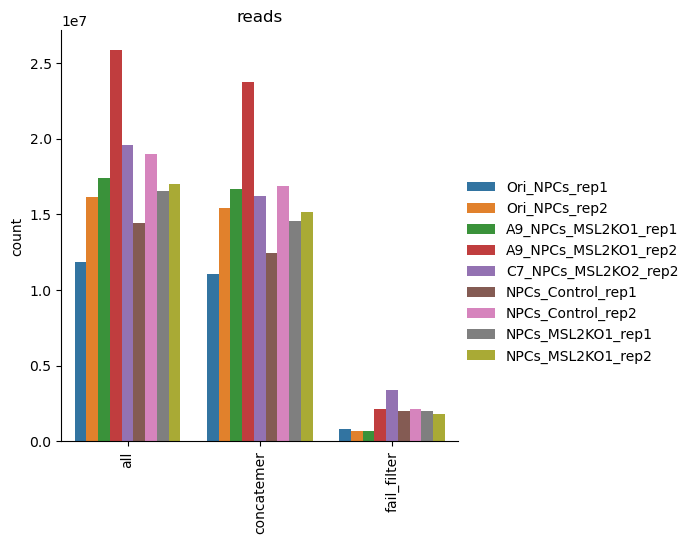

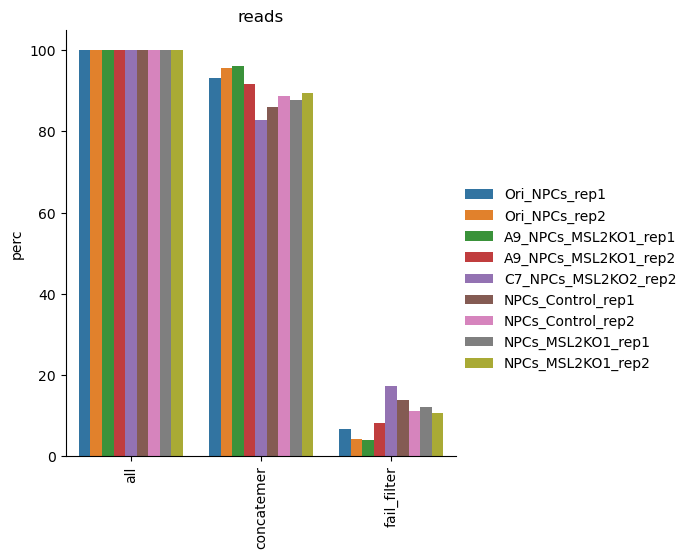

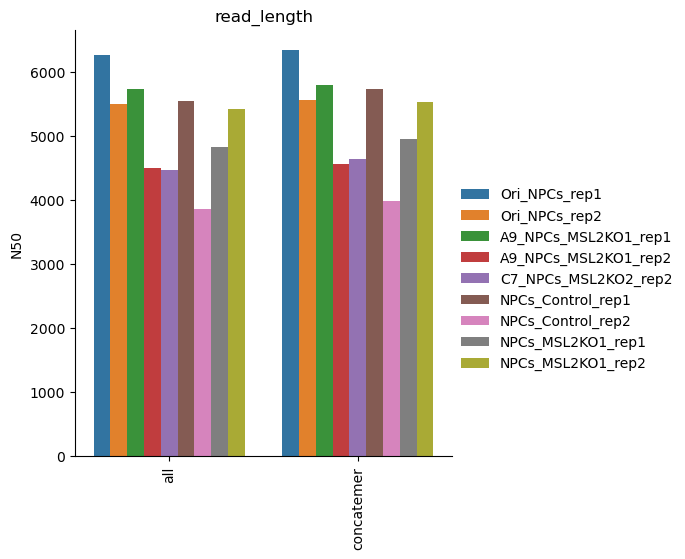

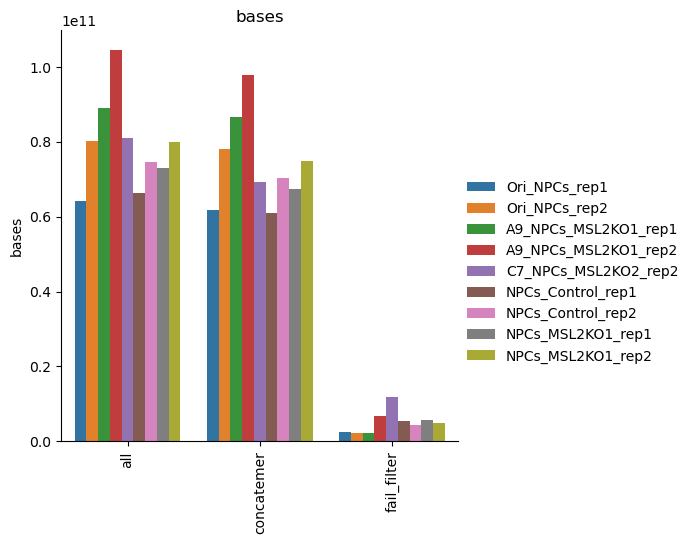

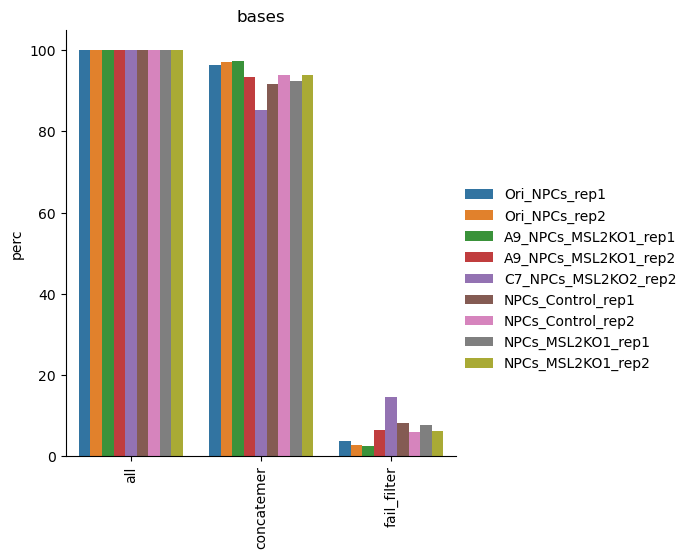

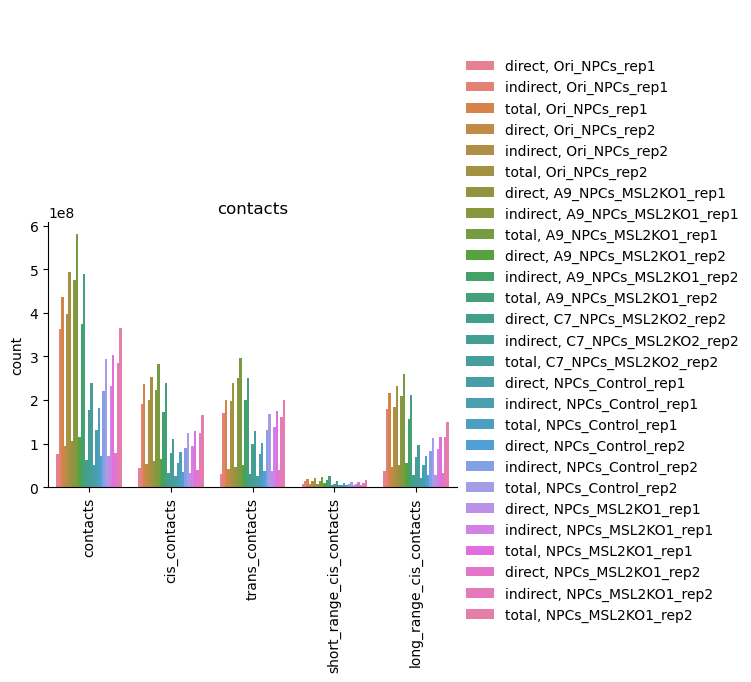

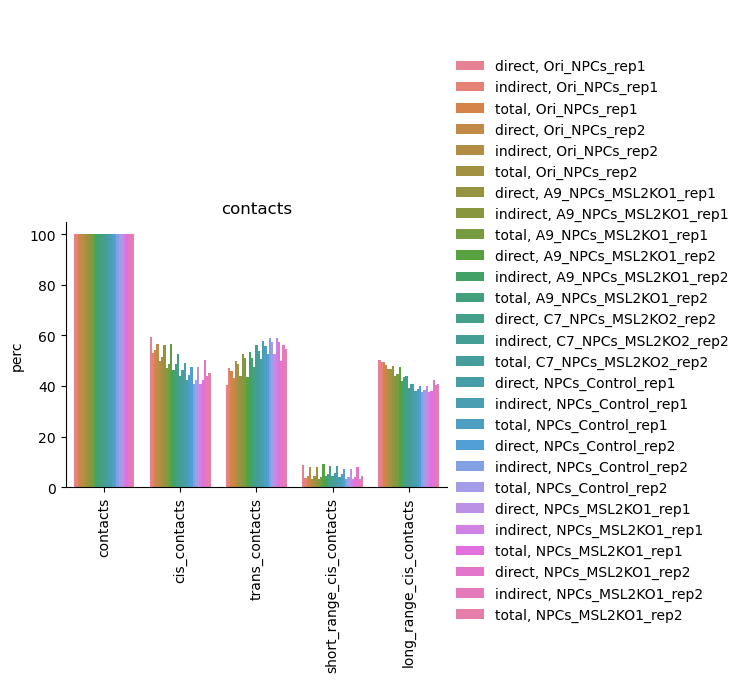

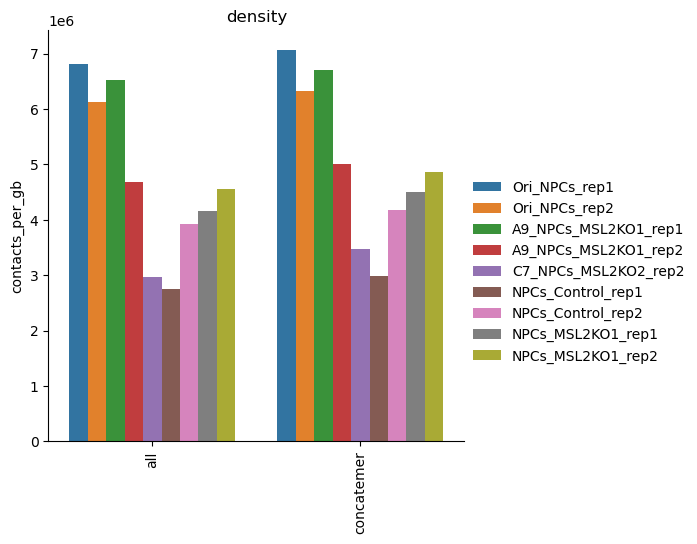

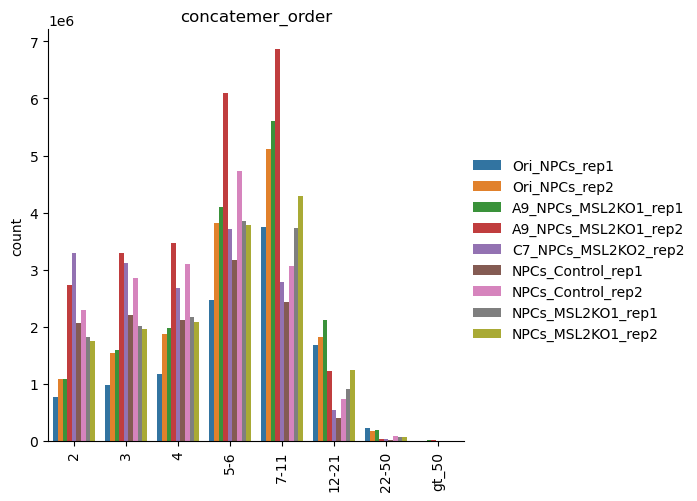

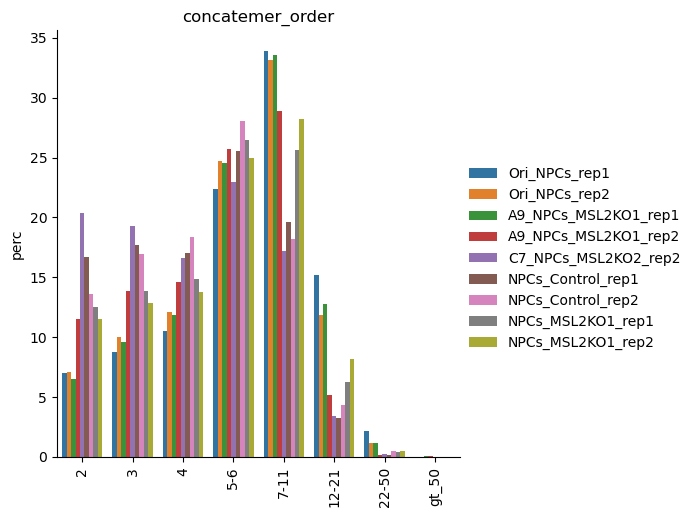

In [16]:
for section in new_df["section"].unique():
    if section == "user_metadata":
        continue
    summary = new_df[new_df["section"] == section]
    for level_1 in summary["level_1"].unique():
        sub_df = summary[summary["level_1"] == level_1]
        # print(sub_df)
        sub_df = sub_df.assign(value=sub_df["value"].astype(float))
        g = sns.catplot(x="level_2", y="value", kind="bar", hue="level_0", data=sub_df, errorbar=None)
        plt.xticks(rotation=90)
        plt.title(section)
        plt.ylabel(level_1)
        plt.xlabel(None)
        g._legend.set_title("")
        plt.show()